In [1]:
from pymongo import MongoClient
client=MongoClient()
db=client.flight_data
collection_1=db.flight_data_collection
import datetime 
import pandas as pd 

def from_unix_timestamp(val):
     #print("Date=", val)
     if (val is None):
         return datetime.datetime.fromtimestamp(0)
     if(val!=0):
      return datetime.datetime.fromtimestamp(val)

In [2]:
print(collection_1.find()[0])


{'_id': ObjectId('58b64d7e566f5d11bce4ac92'), 'aircraft': {'model': {'code': 'A320', 'text': 'Airbus A320-232'}, 'hex': '800AF3', 'registration': 'VT-IAL', 'serialNo': None, 'age': {'availability': True}, 'restricted': False, 'availability': {'serialNo': True, 'age': True}}, 'airline': {'name': 'IndiGo', 'short': 'IndiGo Airlines', 'code': {'iata': '6E', 'icao': 'IGO'}}, 'airport': {'origin': {'name': 'Mumbai Chhatrapati Shivaji International Airport', 'code': {'iata': 'BOM', 'icao': 'VABB'}, 'position': {'latitude': 19.08868, 'longitude': 72.867912, 'country': {'name': 'India', 'code': 'IN'}, 'region': {'city': 'Mumbai'}}, 'timezone': {'name': 'Asia/Kolkata', 'offset': 19800, 'abbr': 'IST', 'abbrName': 'India Standard Time', 'isDst': False}, 'visible': True}, 'destination': {'name': 'Delhi Indira Gandhi International Airport', 'code': {'iata': 'DEL', 'icao': 'VIDP'}, 'position': {'latitude': 28.5665, 'longitude': 77.103081, 'country': {'name': 'India', 'code': 'IN'}, 'region': {'city'

In [3]:
from geopy.distance import vincenty
a=x['airport']["origin"]['position']['latitude']
b=x['airport']['origin']['position']['longitude']
m=(a,b)
c=x['airport']['destination']['position']['latitude']
d=x['airport']['destination']['position']['longitude']
n=(c,d)
z=vincenty(m,n)
print(type(z))
print(z)


NameError: name 'x' is not defined

In [83]:
flight_number=[]
status_text=[]
origin=[]
destination=[]
scheduled_departure=[]
scheduled_arrival=[]
real_departure=[]
real_arrival=[]
estimated_departure=[]
estimated_arrival=[]
duration=[]
timestamp=[]
for item in collection_1.find()[0:50]:
    if item['identification']['number']['default']==None:
        flight_number.append("None")
    else:
        flight_number.append(item['identification']['number']['default'])
    if item['status']['text']==None:
        status_text.append("None")
    else:
        status_text.append(item['status']['text'])
    if item['airport']['origin']==None:
        origin.append("None")
    else:
        origin.append(item['airport']['origin']['name'])
    if item['airport']['destination']==None:
        destination.append("None")
    else:
        destination.append(item['airport']['destination']['name'])
    if item['time']['estimated']['arrival']==None:
        estimated_arrival.append("None")
    else:
        estimated_arrival.append(item['time']['estimated']['arrival'])
    if item['time']['estimated']['departure']==None:
        estimated_departure.append("None")
    else:
        estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
    if item['time']['scheduled']['arrival']==None:
        scheduled_arrival.append('None')
    else:
        scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
    if item['time']['scheduled']['departure']==None:
        scheduled_departure.append('None')
    else:
        scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
    if item['time']['real']['arrival']==None:
        real_arrival.append('None')
    else:
        real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
    if item['time']['real']['departure']==None:
        real_departure.append('None')
    else:
        real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
    if item['time']['other']['duration']==None:
        duration.append("None")
    else:
        duration.append(item['time']['other']['duration'])
    timestamp.append(item['_id'].generation_time)
        

In [84]:
import pandas as pd 

df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration})

df=df[["timestamp","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration"]]

In [85]:
df.head()

,timestamp,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration
0,2017-03-01 04:26:38+00:00,6E198,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,2017-03-01 22:15:00,2017-03-02 00:25:00,2017-03-01 22:15:00,None,None,None,Estimated dep 22:15,7500
1,2017-03-01 04:26:38+00:00,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-03-01 19:30:00,2017-03-01 21:40:00,2017-03-01 19:30:00,None,None,None,Estimated dep 19:30,7200
2,2017-03-01 04:26:38+00:00,6E5409,Indore Devi Ahilyabai Holkar Airport,Delhi Indira Gandhi International Airport,2017-03-01 16:50:00,2017-03-01 18:20:00,2017-03-01 16:50:00,None,None,None,Estimated dep 16:50,5700
3,2017-03-01 04:26:38+00:00,6E4651,Mumbai Chhatrapati Shivaji International Airport,Indore Devi Ahilyabai Holkar Airport,2017-03-01 14:45:00,2017-03-01 16:10:00,2017-03-01 14:45:00,None,None,None,Estimated dep 14:45,4500
4,2017-03-01 04:26:38+00:00,6E3904,Indore Devi Ahilyabai Holkar Airport,Mumbai Chhatrapati Shivaji International Airport,2017-03-01 12:55:00,2017-03-01 14:10:00,2017-03-01 12:55:00,None,None,None,Estimated dep 12:55,4800


In [4]:
#Function for extracting useful information from the database 

def extract(collection):
    from geopy.distance import vincenty
    import pandas as pd 
    flight_number=[]
    status_text=[]
    origin=[]
    destination=[]
    scheduled_departure=[]
    scheduled_arrival=[]
    real_departure=[]
    real_arrival=[]
    estimated_departure=[]
    estimated_arrival=[]
    duration=[]
    timestamp=[]
    distance_travelled=[]
    country_origin=[]
    country_destination=[]
    airline_name=[]
    registration=[]
    for item in collection:
        if item['airport']['origin']==None or item['airport']['destination']==None:
            distance_travelled.append("0 km")
        else:
            n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            distance_travelled.append((vincenty(m,n)))
            #country.append(item['airport']['origin']['position']['country']['name'])
            
        if item['identification']['number']['default']==None:
            flight_number.append("None")
        else:
            flight_number.append(item['identification']['number']['default'])
        if item['status']['text']==None:
            status_text.append("None")
        else:
            status_text.append(item['status']['text'])
        if item['airport']['origin']==None:
            origin.append("None")
            country_origin.append("None")
            #distance_travelled.append('None')
        else:
            origin.append(item['airport']['origin']['name'])
            country_origin.append(item['airport']['origin']['position']['country']['name'])
            #m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            #n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            #distance_travelled.append((vincenty(m,n)))
            
        if item['airport']['destination']==None:
            destination.append("None")
            country_destination.append("None")
        else:
            destination.append(item['airport']['destination']['name'])
            country_destination.append(item['airport']['destination']['position']['country']['name'])
        if item['time']['estimated']['arrival']==None:
            estimated_arrival.append("None")
        else:
            estimated_arrival.append(item['time']['estimated']['arrival'])
        if item['time']['estimated']['departure']==None:
            estimated_departure.append("None")
        else:
            estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
        if item['time']['scheduled']['arrival']==None:
            scheduled_arrival.append('None')
        else:
            scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
        if item['time']['scheduled']['departure']==None:
            scheduled_departure.append('None')
        else:
            scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
        if item['time']['real']['arrival']==None:
            real_arrival.append('None')
        else:
            real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
        if item['time']['real']['departure']==None:
            real_departure.append('None')
        else:
            real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
        # New added code
        if item['aircraft']['registration']==None:
            registration.append("None")
        else:
            registration.append(item['aircraft']['registration'])
        if item['airline']==None or item['airline']['name']==None:
            airline_name.append("None")
        else:
            airline_name.append(item['airline']['name'])
        if item['time']['other']['duration']==None:
            duration.append("None")
        else:
            duration.append(item['time']['other']['duration'])
        timestamp.append(item['_id'].generation_time)
        
    df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration,"distance_travelled":distance_travelled,
                    "country_origin":country_origin,"country_dest":country_destination,"reg":registration,"airline_name":airline_name})

    df=df[["timestamp","reg","airline_name","country_origin","country_dest","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration","distance_travelled"]]
    
    return df
        
    

In [5]:
k=extract(collection_1.find())

In [61]:
#k.to_csv("final_data.csv",sep=',')

In [90]:
#type(k.to_dict('records'))


In [6]:
k.shape

(375632, 17)

### Data preprocessing - removing rows with missing values

In [7]:
data=k[k.scheduled_arrival!="None"]
data=data[data.real_arrival!="None"]
data=data[data.real_departure!='None']
data=data[data.scheduled_departure!='None']


In [15]:
new_data=data.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status","country_origin","country_dest","reg","airline_name"])

In [16]:
new_data.shape

(72490, 17)

In [11]:
new_data.head()

,timestamp,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled
7,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-03-01 06:25:00,2017-03-01 08:25:00,None,None,2017-03-01 06:31:37,2017-03-01 08:03:00,Landed 08:03,5524,1082.7558529029552 km
8,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-28 21:00:00,2017-02-28 22:55:00,None,None,2017-02-28 20:56:07,2017-02-28 22:31:00,Landed 22:32,5787,1082.7558529029552 km
9,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E5156,Delhi Indira Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-02-28 19:20:00,2017-02-28 20:30:00,None,None,2017-02-28 19:29:33,2017-02-28 20:13:00,Landed 20:13,2665,423.7601185098625 km
10,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E174,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,2017-02-28 16:30:00,2017-02-28 18:40:00,None,None,2017-02-28 16:49:10,2017-02-28 18:23:00,Landed 18:23,5660,1134.6651511087132 km
11,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,2017-02-28 12:15:00,None,None,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km


In [203]:
# writing to csv , uncomment the code for the same 
#new_data.to_csv("refined_data.csv")

In [12]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                               object
scheduled_arrival                                                 object
estimated_departure                                               object
estimated_arrival                                                 object
real_departure                                                    object
real_arrival                                       

In [13]:
new_data["scheduled_departure"]=pd.to_datetime(new_data.scheduled_departure)
new_data['scheduled_arrival']=pd.to_datetime(new_data.scheduled_arrival)
new_data['real_arrival']=pd.to_datetime(new_data.real_arrival)
new_data['real_departure']=pd.to_datetime(new_data.real_departure)

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [14]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                       datetime64[ns]
scheduled_arrival                                         datetime64[ns]
estimated_departure                                               object
estimated_arrival                                                 object
real_departure                                            datetime64[ns]
real_arrival                                       

In [17]:
new_data["arrival_delay"]=(new_data['real_arrival']-new_data['scheduled_arrival']).astype('timedelta64[m]')
new_data['departure_delay']=(new_data['real_departure']-new_data['scheduled_departure']).astype('timedelta64[m]')

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
new_data.head()

,timestamp,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay
7,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-03-01 06:25:00,2017-03-01 08:25:00,None,None,2017-03-01 06:31:37,2017-03-01 08:03:00,Landed 08:03,5524,1082.7558529029552 km,-22.0,6.0
8,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-28 21:00:00,2017-02-28 22:55:00,None,None,2017-02-28 20:56:07,2017-02-28 22:31:00,Landed 22:32,5787,1082.7558529029552 km,-24.0,-4.0
9,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E5156,Delhi Indira Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-02-28 19:20:00,2017-02-28 20:30:00,None,None,2017-02-28 19:29:33,2017-02-28 20:13:00,Landed 20:13,2665,423.7601185098625 km,-17.0,9.0
10,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E174,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,2017-02-28 16:30:00,2017-02-28 18:40:00,None,None,2017-02-28 16:49:10,2017-02-28 18:23:00,Landed 18:23,5660,1134.6651511087132 km,-17.0,19.0
11,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,2017-02-28 12:15:00,None,None,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km,56.0,67.0


In [19]:
new_data["hour_dep"]=new_data.scheduled_departure.dt.hour
new_data["weekday_dep"]=new_data.scheduled_departure.dt.weekday_name
new_data["day_of_month_dep"]=new_data.scheduled_departure.dt.day


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### Duration of collected dataset 

In [20]:
print("MAXIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.max())
print("\n")
print("MINIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.min())

MAXIMUM TIMESTAMP IN DATASET:
2017-03-20 12:30:00


MINIMUM TIMESTAMP IN DATASET:
2017-02-22 00:55:00


In [21]:
#Shape of datafarme
new_data.shape
#new_data.to_csv("refined_data.csv")

(72490, 22)

In [22]:
new_data.describe(include=["object"])

,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled,weekday_dep
count,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490,72490
unique,446,13,33,30,2315,108,104,7415,7498,1,1,59575,41992,1440,12179,72465,7
top,VT-JCZ,IndiGo,India,India,6E339,Delhi Indira Gandhi International Airport,Delhi Indira Gandhi International Airport,2017-03-10 07:00:00,2017-03-09 20:20:00,None,None,2017-03-11 14:10:00,2017-03-14 07:55:00,Landed 10:37,2940,0 km,Friday
freq,258,25583,66908,66820,154,13846,14065,63,49,72490,72490,8,17,107,439,26,11906


In [23]:
# removing international flights 

new_data_domestic=new_data[(new_data.country_origin=="India") & (new_data.country_dest=="India")]

In [24]:
new_data_domestic.shape
#del new_data_domestic["timestamp"]
#new_data_domestic.to_csv("all_domestic.csv")

(61414, 22)

In [25]:
qwe=new_data_domestic.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status","reg","airline_name"])

In [26]:
qwe.shape

(61414, 22)

## Contribution of Individual domestic carriers

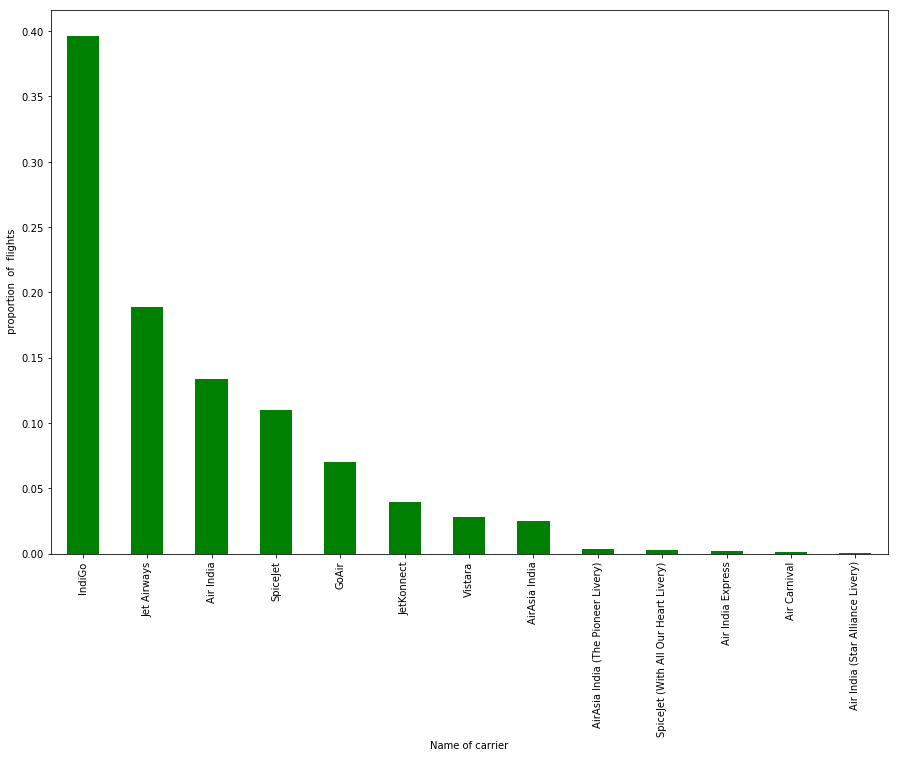

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline
qwe.airline_name.value_counts(normalize=True).plot(kind="Bar",figsize=(15,10),color="g")
plt.ylabel(" proportion  of  flights")
plt.xlabel("Name of carrier")

## Distribution of flights by day of the week 

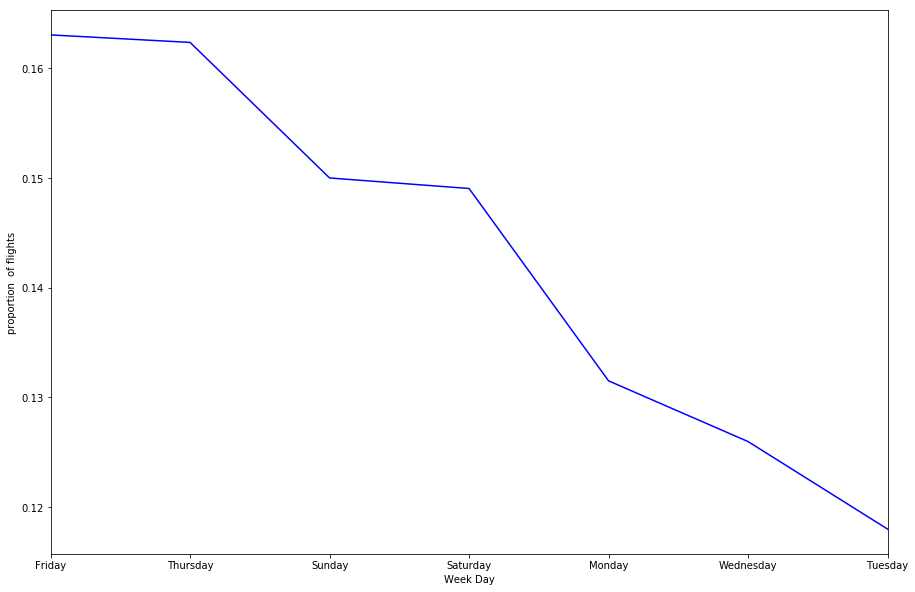

In [35]:
qwe.weekday_dep.value_counts(normalize=True).plot(kind="line",figsize=(15,10),color="b")
plt.ylabel("proportion  of flights")
plt.xlabel("Week Day")

## Distribution of flights by ORIGIN Airport 

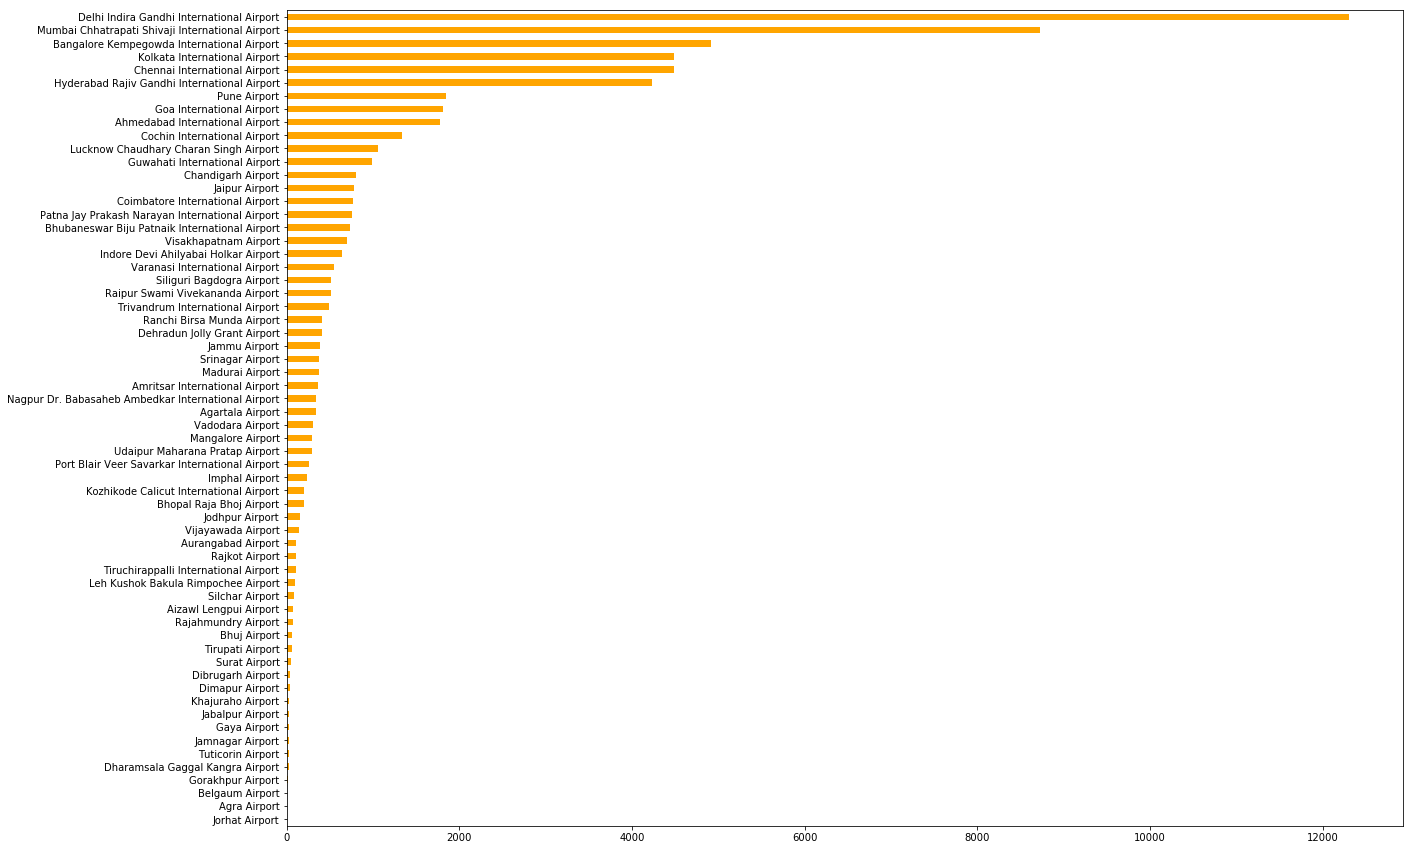

In [44]:
qwe.origin.value_counts(normalize=False,ascending=True).plot(kind="barh",figsize=(20,15),color="orange")

In [58]:
q=qwe.origin.value_counts()
print(q.shape)

(62,)


## Filtering out delayed flights ( arrival_delay >0 )

In [45]:
#filtering out delayed flights,if arrival_delay is greater than 0 , it is considered delayed 

delayed_flights_0_min=new_data_domestic[new_data_domestic.arrival_delay>0]
#delayed_flights_0_min.to_csv("delayed_flight_final.csv")

In [46]:
#Printing the shape of delayed flight 


delayed_flights_0_min.shape

(23505, 22)

In [47]:
# importing libraries for plotting 

import matplotlib.pyplot as plt 
%matplotlib inline
del delayed_flights_0_min['timestamp']

In [48]:
# Checking the structure of dataset 

delayed_flights_0_min.head()

,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,...,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
11,VT-IAL,IndiGo,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,2017-02-28 12:15:00,None,...,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km,56.0,67.0,10,Tuesday,28
18,VT-IAL,IndiGo,India,India,6E238,Ahmedabad International Airport,Chennai International Airport,2017-02-27 09:55:00,2017-02-27 12:10:00,None,...,2017-02-27 10:18:32,2017-02-27 12:24:00,Landed 12:24,7564,1371.7036839622774 km,14.0,23.0,9,Monday,27
20,VT-IAL,IndiGo,India,India,6E238,Kolkata International Airport,Jaipur Airport,2017-02-27 05:20:00,2017-02-27 07:25:00,None,...,2017-02-27 05:23:10,2017-02-27 07:35:00,Landed 07:44,8474,1358.1577783850107 km,10.0,3.0,5,Monday,27
30,VT-IAL,IndiGo,India,India,6E6493,Bangalore Kempegowda International Airport,Kolkata International Airport,2017-02-25 18:15:00,2017-02-25 20:40:00,None,...,2017-02-25 18:46:18,2017-02-25 20:57:00,Landed 21:00,8076,1544.731830735519 km,17.0,31.0,18,Saturday,25
36,VT-IAL,IndiGo,India,India,6E963,Delhi Indira Gandhi International Airport,Bangalore Kempegowda International Airport,2017-02-24 19:45:00,2017-02-24 22:30:00,None,...,2017-02-24 19:59:29,2017-02-24 22:32:33,Landed 22:32,9184,1702.6538858818212 km,2.0,14.0,19,Friday,24


## Descriptive statistics for "arrival_delay" variable

In [49]:
print("Average arrival delay across all airports when delayed :{}".format(delayed_flights_0_min.arrival_delay.mean()))
print("Median arrival delay across all airports when delayed:{}".format(delayed_flights_0_min.arrival_delay.median()))
print("Standard deviation of the arrival delay when delayed  :{}".format(delayed_flights_0_min.arrival_delay.std()))

Average arrival delay across all airports when delayed :24.17383535417996
Median arrival delay across all airports when delayed:15.0
Standard deviation of the arrival delay when delayed  :31.52678695936653


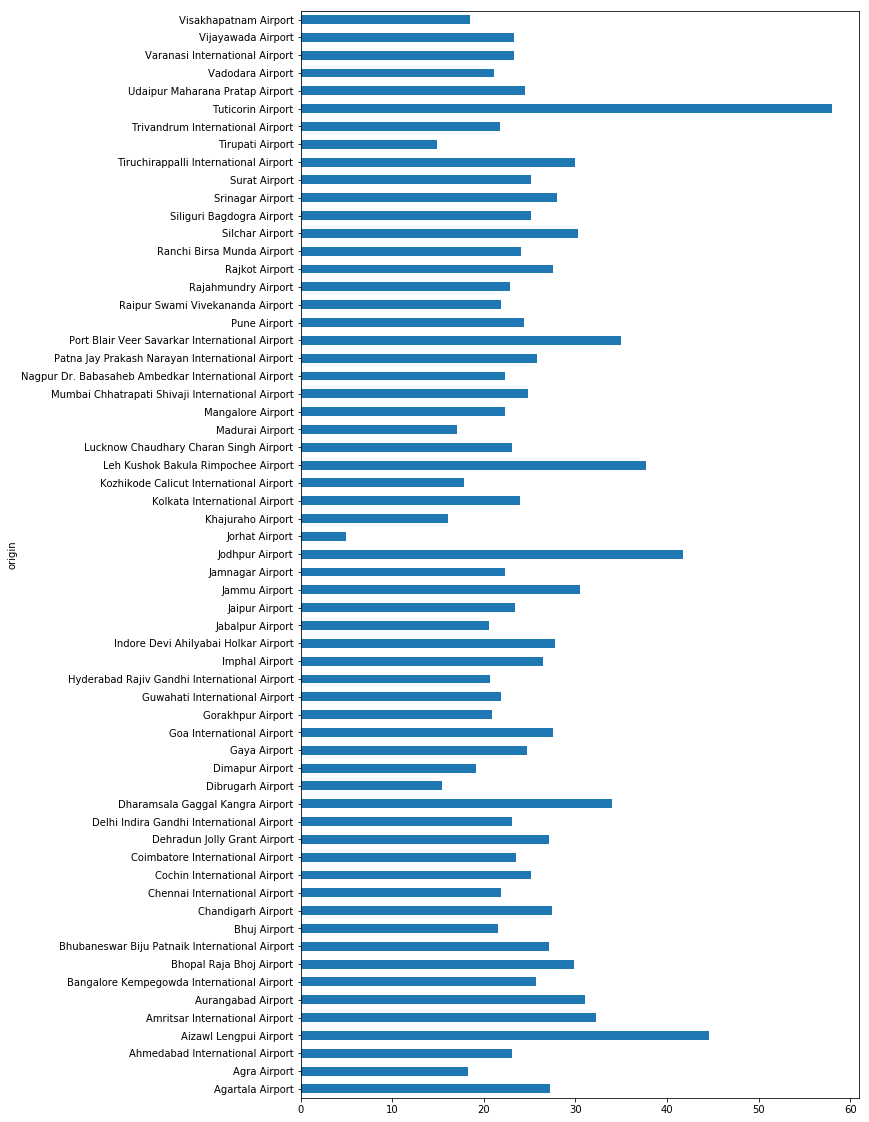

In [54]:
delayed_flights_0_min.groupby("origin").arrival_delay.mean().plot(kind="barh",figsize=(10,20))


# Average arrival delay on hourly basis

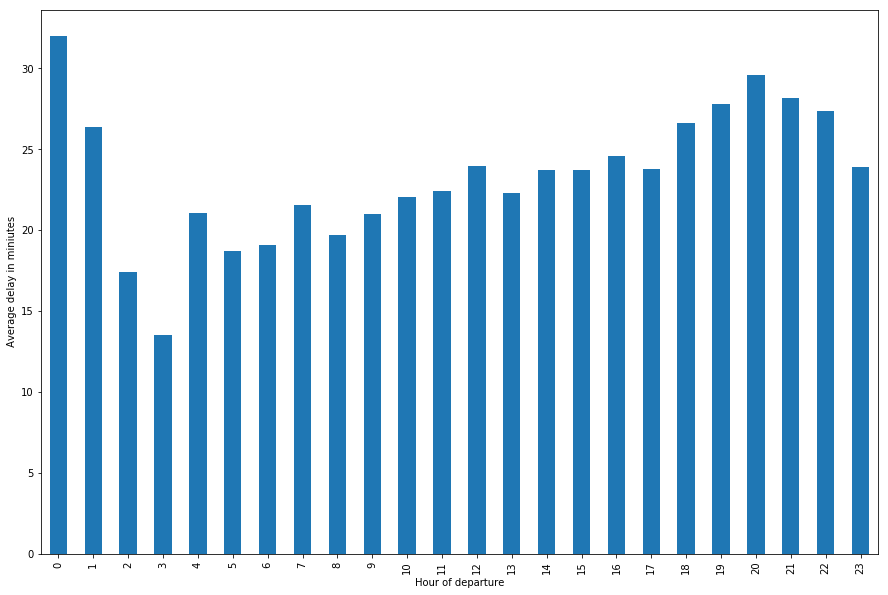

In [66]:
delayed_flights_0_min.groupby("hour_dep").arrival_delay.mean().plot(kind="bar",figsize=(15,10))
plt.xlabel("Hour of departure")
plt.ylabel(" Average delay in miniutes")

# Average arrival delay based on weekdays

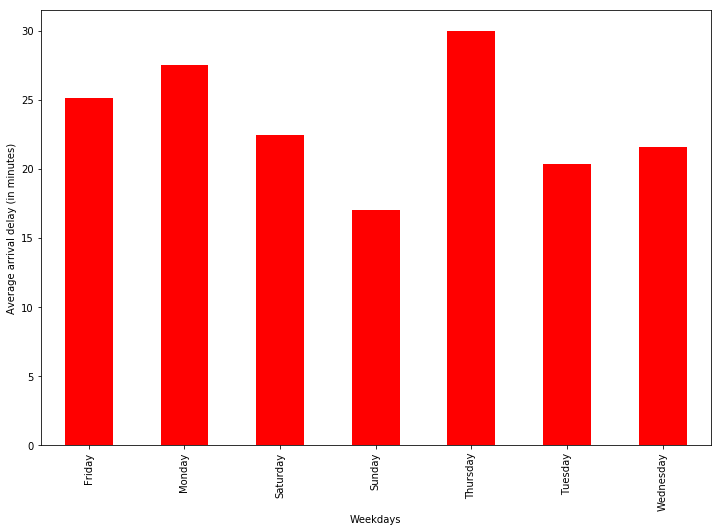

In [67]:
delayed_flights_0_min.groupby("weekday_dep").arrival_delay.mean().plot(kind="bar",figsize=(12,8),color="r")
plt.ylabel("Average arrival delay (in minutes)")
plt.xlabel("Weekdays")

In [68]:
delayed_stats=delayed_flights_0_min.groupby('airline_name').arrival_delay.agg(["mean","median"])

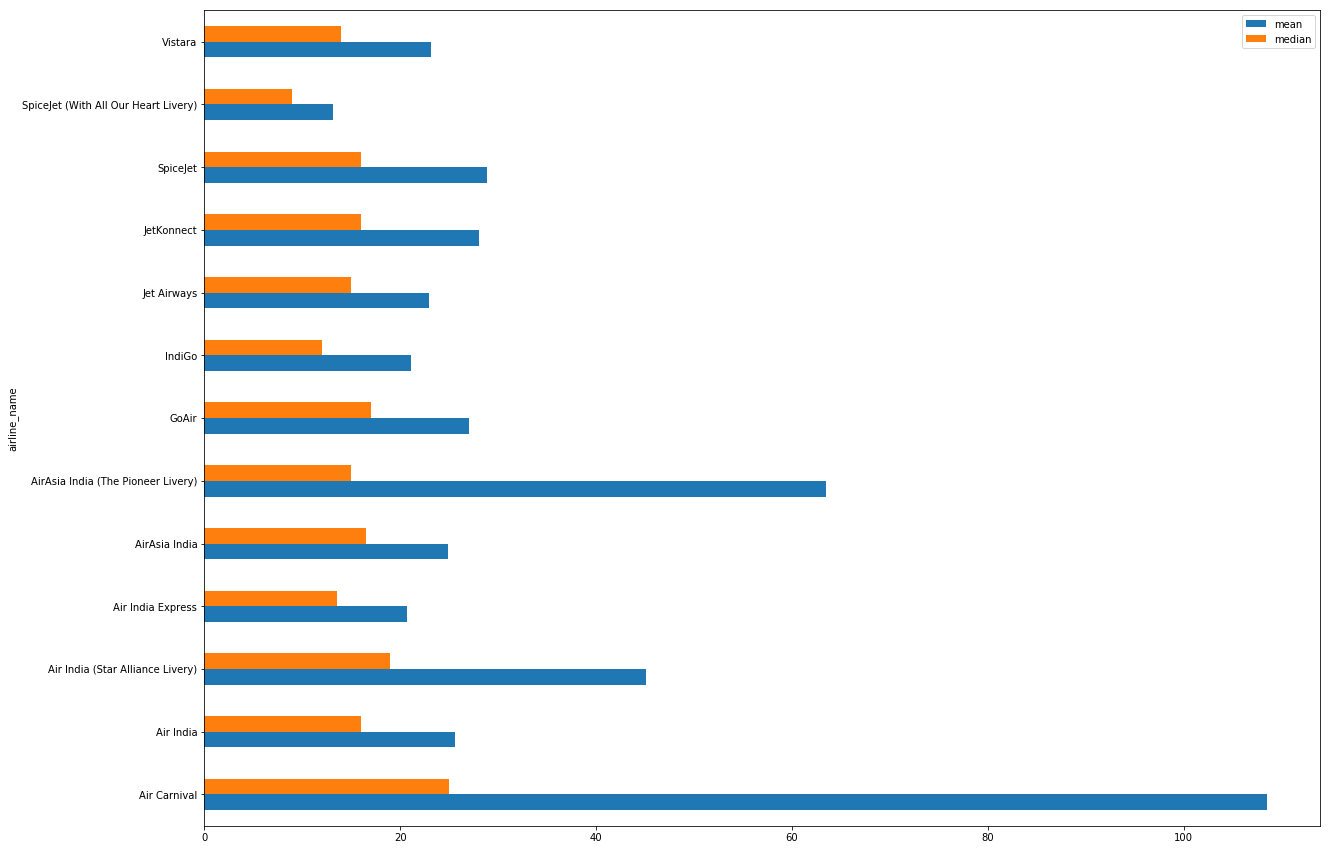

In [69]:

delayed_stats.plot(kind='barh',figsize=(20,15))

### Average delay by  registration number 

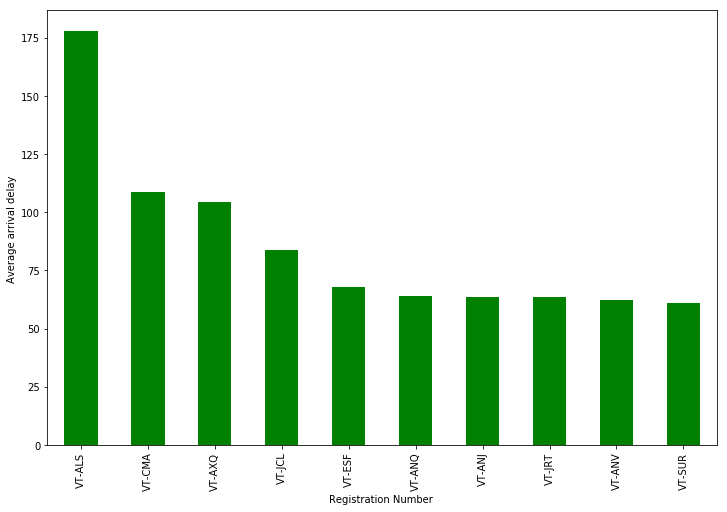

In [74]:
delayed_flights_0_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)[0:10].plot(kind="bar",color="g",
                                                                                                  figsize=(12,8))
plt.xlabel("Registration Number ")
plt.ylabel("Average arrival delay ")

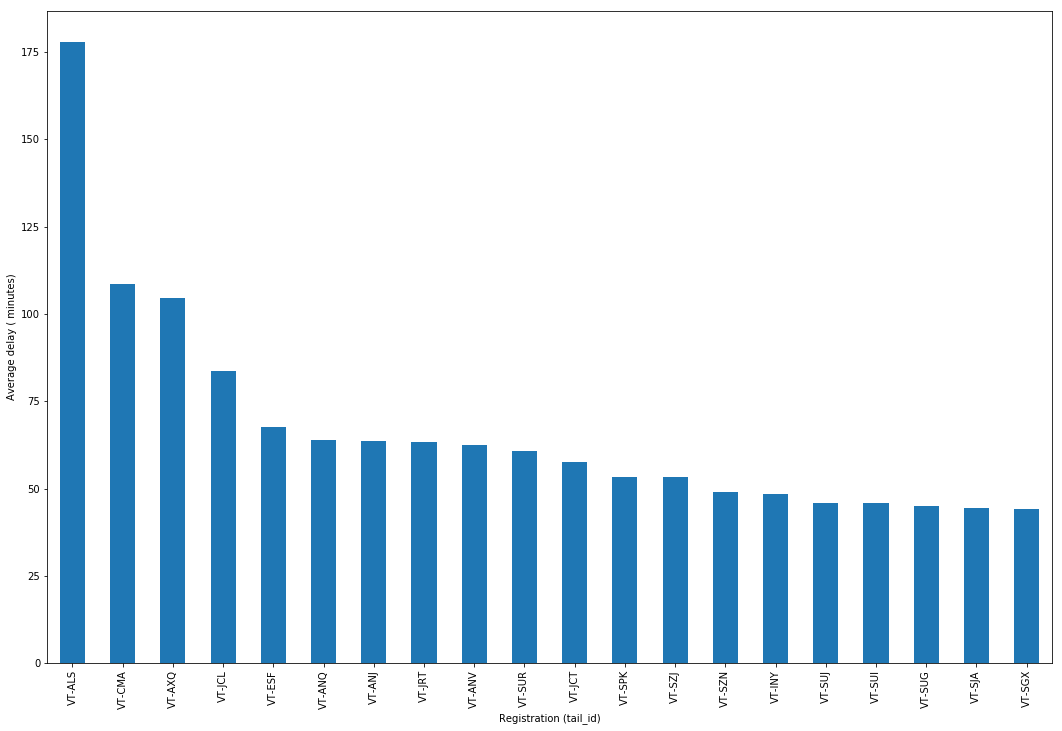

In [75]:
delayed_flights_0_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)[0:20].plot(kind="bar",figsize=(18,12))
plt.xlabel("Registration (tail_id)")
plt.ylabel("Average delay ( minutes)")

# Distribution of flight delays

### 1.Percentage of flights with  Less than  or equal to 15 minutes delay 

In [76]:
    (delayed_flights_0_min[delayed_flights_0_min.arrival_delay<=15].arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"]))*100

51.94639438417358

### 2.Percentage of  flights with  arrival delay greater than 15 min but less than or equal 30 min

In [77]:
x=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>15][delayed_flights_0_min.arrival_delay<=30]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(x*100)

24.0672197405


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 3. Percentage of flights with arrival delay greater than 30 min  but less than or equal to 60 min

In [78]:
y=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>30][delayed_flights_0_min.arrival_delay<=60]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(y*100)

16.0391406084


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 4. Percentage of flights with arrival delay greater than 60 min but less than or equal to 2 hours

In [79]:
z=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>60][delayed_flights_0_min.arrival_delay<=120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(z*100)

6.21144437354


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 5.Percentage of  flight with arrival delay greater than 2 hour

In [80]:
p=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(p*100)

1.73580089343


In [31]:
q=delayed_flights_0_min.groupby("flight_number").arrival_delay.mean()

In [32]:
type(q)

pandas.core.series.Series

In [49]:
q[q>30].sort_values(ascending=False)[0:5]


flight_number
AI964    337.333333
2S102    268.444444
SG999    266.000000
6E523    238.000000
SG56     223.375000
Name: arrival_delay, dtype: float64

In [60]:
#print("flight {} flown  {} number of times".format("SG999",new_data[new_data.flight_number=="SG999"].origin.count()))



In [82]:
qwe.shape

(61414, 22)

In [83]:
from bokeh.plotting import figure, output_notebook, show

In [84]:
output_notebook()

Loading BokehJS ...

In [88]:
#p = figure(width=500, height=500)
#p.circle(qwe.origin.value_counts(),qwe.groupby("origin").arrival_delay.mean())
#p.circle(x, y, size=7, color="firebrick", alpha=0.5)
#show(p)

In [117]:
qwe.shape

(61414, 22)

In [122]:
qwe=qwe[qwe.duration!="None"]
qwe=qwe[qwe.flight_number!="None"]
qwe=qwe[qwe.reg!="None"]
qwe=qwe[qwe.origin!="None"]
qwe=qwe[qwe.destination!="None"]
#qwe=qwe[qwe.hour_dep!="None"]
#qwe=qwe[qwe.day_of_month_dep!="None"]
qwe=qwe[qwe.weekday_dep!="None"]
print(qwe.shape)


(61401, 22)


In [161]:
features=qwe[["airline_name","flight_number","origin","destination","hour_dep","day_of_month_dep","weekday_dep"]]

In [169]:
labels=qwe["arrival_delay"]
label=[]
for items in labels:
    if items>60:
        label.append(1)
    else:
        label.append(0)
        
print(len(label))

61401


In [170]:
features_final=pd.get_dummies(features,drop_first=True)


In [181]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import numpy
from sklearn.metrics import accuracy_score


In [177]:
X_train,X_test,Y_train,Y_test=train_test_split(features_final,numpy.array(label),test_size=0.30,random_state=42)

In [178]:
X_train.shape

(42980, 2067)

In [179]:
Y_train.shape

(42980,)

In [180]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [182]:
pred=clf.predict(X_test)
print(accuracy_score(pred,Y_test))


0.966559904457


In [186]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,fbeta_score
print(confusion_matrix(pred,Y_test))
print(precision_score(pred,Y_test))
print(recall_score(pred,Y_test))
print(fbeta_score(pred,Y_test,beta=0.5))

[[17587   351]
 [  265   218]]
0.383128295255
0.451345755694
0.395070677782


In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {"min_samples_split":[2,3,4,5,6,7,8,9,10]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit =grid_obj.fit(X_train,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
#print ("Unoptimized model\n------")
#print "Accuracy score on testing data: {:.4f}".format(accuracy_score(Y_test, predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
#print "\nOptimized Model\n------"
#print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions))
#print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

In [191]:
print(grid_fit.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')


In [195]:

predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print(accuracy_score(Y_test,best_predictions))

0.967374192498


In [197]:
print(fbeta_score(Y_test,best_predictions,0.5))

0.443565181175


In [198]:
print(precision_score(Y_test,best_predictions))

0.465065502183
